### Midterm - Tomas Boukal

### Part 1 - API request

In [4]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
attemp = '{"cuni":"58260118"}'
r = requests.post('https://ies-midterm.soulution.rocks/login',attemp)

In [6]:
r #200 good

<Response [200]>

In [8]:
#We take look at the text

d = json.loads(r.text)
d

{'data': {'personal_code': '06469ac2',
  'dataset_ids': ['557b58dd1d',
   '484090f05d',
   '3e8641892a',
   '7be200ce5b',
   '5df3513c79']},
 'message': 'Hello, Boukal Tomáš, Bc! Good luck with the midterm. GET your data set from /data/file_id endpoint; use the codes you received in the data response as the file_id parameter! Print the personal code in your notebook.'}

In [12]:
#according to the message we need to get our hands on the personal code

#here is the printout
print(d['data']['personal_code'])

06469ac2


In [21]:
# We need to use the values that go under the key dataset_ids

datasets_codes = d['data']['dataset_ids']
datasets_codes

['557b58dd1d', '484090f05d', '3e8641892a', '7be200ce5b', '5df3513c79']

**Problem is the probability**
- Writing the following would give us just a part of the data

```Python
for datasets_codes in codes: 
    r = requests.get(url=f'https://ies-midterm.soulution.rocks/data/{datasets_codes}')
    
d = r.json()['data']
dataset = pd.DataFrame(d['data']).set_index('Date')
dataset
````

- To solve the issue with probability (there might be no data returning, we will check whether the status_code 200 is right

In [81]:
# To make it quicker we will create a list for filling
container_dt = []

# we will iterate over the individual codes
for ids in datasets_codes:
    # send GET request
    r = requests.get(url=f'https://ies-midterm.soulution.rocks/data/{datasets_codes}')
    
    while r.status_code !=200:  #it can fail (this is when the status code is not == 200, then run it again)
        r = requests.get(url=f'https://ies-midterm.soulution.rocks/data/{datasets_codes}')
    
    
# We will parse the json
content_for_append = r.json()['data']
    
# and individual data should be included
container_dt.append(content_for_append)
    
    
container_dt

[{'company': 'SLA',
  'data': [{'Date': '2019-01-02',
    'Open': '77.48999786376953',
    'High': '78.98999786376953',
    'Low': '76.83999633789062',
    'Close': '77.48999786376953',
    'Adj.Close': '77.48999786376953',
    'Volume': '20000'},
   {'Date': '2019-01-03',
    'Open': '77.48999786376953',
    'High': '77.48999786376953',
    'Low': '77.48999786376953',
    'Close': '77.48999786376953',
    'Adj.Close': '77.48999786376953',
    'Volume': '0'},
   {'Date': '2019-01-04',
    'Open': '77.48999786376953',
    'High': '77.48999786376953',
    'Low': '77.48999786376953',
    'Close': '77.48999786376953',
    'Adj.Close': '77.48999786376953',
    'Volume': '0'},
   {'Date': '2019-01-07',
    'Open': '81.2699966430664',
    'High': '83.19999694824219',
    'Low': '80.87000274658203',
    'Close': '81.2699966430664',
    'Adj.Close': '81.2699966430664',
    'Volume': '35050'},
   {'Date': '2019-01-08',
    'Open': '81.2699966430664',
    'High': '81.2699966430664',
    'Low': '8

In [82]:
#now we have the container with json data, and there should be multiple companies, over which we should itterate

for companies in container_dt:
    
    #and we would want to index through companies, despite we still only have SLA
    for company_index in data:
        row = pd.DataFrame(company_index, index = [company])
        df = pd.concat([df, row])
    
    
# We should also put the data as index
df['Date'] = pd.to_datetime(df['Date'])

#and sort it by data (to check whether we have all the data (which we do not))
df = df.sort_values('Date')
df
# we would have duplicates in the data
# we would have duplicates in the data


,Date,Open,High,Low,Close,Adj.Close,Volume
SLA,2019-01-02,77.48999786376953,78.98999786376953,76.83999633789062,77.48999786376953,77.48999786376953,20000
SLA,2019-01-02,77.48999786376953,78.98999786376953,76.83999633789062,77.48999786376953,77.48999786376953,20000
SLA,2019-01-02,77.48999786376953,78.98999786376953,76.83999633789062,77.48999786376953,77.48999786376953,20000
SLA,2019-01-02,77.48999786376953,78.98999786376953,76.83999633789062,77.48999786376953,77.48999786376953,20000
SLA,2019-01-02,77.48999786376953,78.98999786376953,76.83999633789062,77.48999786376953,77.48999786376953,20000
...,...,...,...,...,...,...,...
SLA,2020-04-29,59.880001068115234,60.400001525878906,57.0,59.880001068115234,59.880001068115234,7495
SLA,2020-04-29,59.880001068115234,60.400001525878906,57.0,59.880001068115234,59.880001068115234,7495
SLA,NaT,NaN,NaN,NaN,NaN,NaN,NaN
SLA,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
# We should also drop NaN
df2 = df.dropna()
# And we have duplicate, probably, instead of trying to get a new data, we have itterated over the same code
df3 = df2.drop_duplicates()

#and set data as index
df_fin = df3.set_index('Date')
df_fin


,Open,High,Low,Close,Adj.Close,Volume
Date,,,,,,
2019-01-02,77.48999786376953,78.98999786376953,76.83999633789062,77.48999786376953,77.48999786376953,20000
2019-01-03,77.48999786376953,77.48999786376953,77.48999786376953,77.48999786376953,77.48999786376953,0
2019-01-04,77.48999786376953,77.48999786376953,77.48999786376953,77.48999786376953,77.48999786376953,0
2019-01-07,81.2699966430664,83.19999694824219,80.87000274658203,81.2699966430664,81.2699966430664,35050
2019-01-08,81.2699966430664,81.2699966430664,81.2699966430664,81.2699966430664,81.2699966430664,0
...,...,...,...,...,...,...
2020-04-23,53.900001525878906,54.650001525878906,52.52000045776367,53.900001525878906,53.900001525878906,93525
2020-04-24,56.18000030517578,56.220001220703125,53.0,56.18000030517578,56.18000030517578,26992
2020-04-27,56.18000030517578,56.18000030517578,56.18000030517578,56.18000030517578,56.18000030517578,0


the time series should be from 2019-01-02 to 2020-11-20.
- Is it the case in your sample? 

- I know, I am aware

what is the highest and lowest Adj Close price the company recorded? 

In [87]:
print(df_fin['Adj.Close'].min())
print(df_fin['Adj.Close'].max())

47.939998626708984
84.69000244140625


What day was the highest number of shares traded?

In [106]:
df_fin['Volume'].astype(float).idmax()

AttributeError: 'Series' object has no attribute 'idmax'

For the company with the highest volume of shares traded over the whole period, plot
their share price over time 

<AxesSubplot:xlabel='Date'>

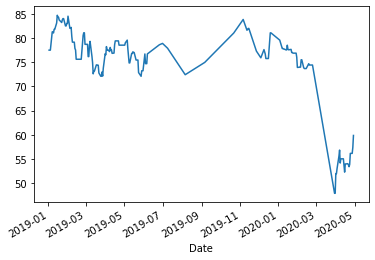

In [105]:
df_fin['Adj.Close'].astype(float).plot()

when did the company record the highest gain and highest loss for the day? (logarithmic
loss) 

In [112]:
df_fin['diff'] = df_fin['Open'].astype(float) - df_fin['Close'].astype(float)
df_fin['diff'][2:].astype(float).idxmax() #probably wrong

Timestamp('2019-01-04 00:00:00')